In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [2]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [ ]:
## Summary Statistics 

In [3]:
q3="select min(population),max(population),min(population_growth),max(population_growth) from facts"
pd.read_sql_query(q3,conn)

min(population)  max(population)  min(population_growth)  \
0                0       7256490011                     0.0   

   max(population_growth)  
0                    4.02

In [5]:
## Outliers 

In [6]:

q4 = "select * from facts where population == (select max(population) from facts);"

pd.read_sql_query(q4, conn)

id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None

In [7]:

q5 = "select * from facts where population == (select min(population) from facts);"

pd.read_sql_query(q5, conn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None

In [ ]:
## Histogram

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2467cb9a90>,
      dtype=object)

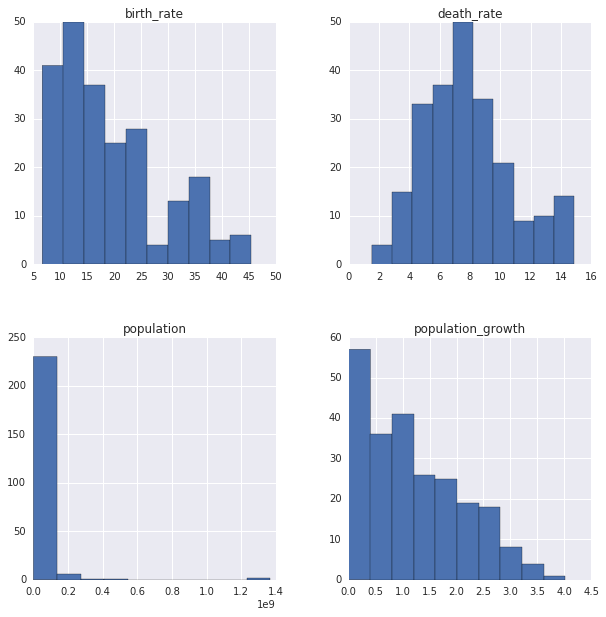

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)